## The Plan 

 - Import Packages 
 - Get API Ref 
 - Est Connection 
 - Test Download 
 - Inspect the Download 
 - 

In [1]:
## Import Packages 

from bs4 import BeautifulSoup as bs 

### Call on the API - Alphavantage 

#### TODO
- remove key from url 
- tidy output 
- compare other APIs 

In [43]:
## API Details - get Data 

import requests
import json 
import pandas as pd 

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=2EHSWV76OD92A71S'
r = requests.get(url)
data = json.loads(r.text)
meta = data['items']
feed = data['feed'] 



df_f = pd.DataFrame.from_dict(pd.json_normalize(feed), orient = 'columns')

# df_m = pd.DataFrame.from_dict(pd.json_normalize(meta), orient = 'columns') 

df.head()



50


,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,"Buy, Sell, or Hold: Apple",https://www.fool.com/investing/2024/05/04/buy-...,20240504T071400,"[CFA, Lawrence Rothman]",What should you do with your Apple shares?,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.1...",0.118611,Neutral,"[{'ticker': 'META', 'relevance_score': '0.1288..."
1,'AI Revolution Now Coming To Cupertino:' Tech ...,https://www.benzinga.com/analyst-ratings/analy...,20240504T062300,[Rounak Jain],Apple Inc.'s AAPL highly-anticipated AI strate...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.199469,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.0911..."
2,"Market Rally Makes Bullish Move, Nvidia A Buy",https://www.investors.com/market-trend/stock-m...,20240503T211500,"[Investor's Business Daily, ED CARSON]",Dow Jones Futures: Stock Market Makes Bullish ...,https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,n/a,www.investors.com,"[{'topic': 'IPO', 'relevance_score': '0.158519...",0.134650,Neutral,"[{'ticker': 'META', 'relevance_score': '0.0610..."
3,Is Apple Stock Going to $230? 1 Wall Street An...,https://www.fool.com/investing/2024/05/03/appl...,20240503T210400,[John Ballard],Apple is bullish on its AI opportunity and say...,https://g.foolcdn.com/editorial/images/775705/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.388450,Bullish,"[{'ticker': 'BAC', 'relevance_score': '0.11634..."
4,Summary Notice of Pendency and Proposed Settle...,https://www.benzinga.com/pressreleases/24/05/g...,20240503T203916,[Globe Newswire],"CUPERTINO, Calif., May 03, 2024 ( GLOBE NEWSWI...",https://www.benzinga.com/next-assets/images/sc...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.215921,Somewhat-Bullish,"[{'ticker': 'DSSMY', 'relevance_score': '0.030..."


### Create a 'WordCloud' from the article summaries 

Can be put into a function in a visualisation class if required 

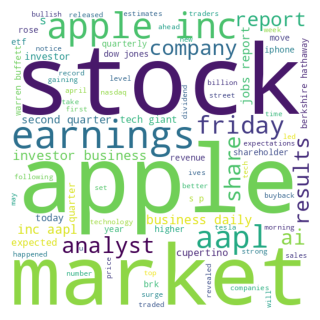

In [3]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = ' '

stopwords = set(STOPWORDS)

bow = df.summary.str.cat()
tokens = bow.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

comment_words += " ".join(tokens)+ " "

word_cloud = WordCloud(width = 500,
                       height = 500,
                       background_color = "white",
                       min_font_size = 10,
                       stopwords = stopwords).generate(comment_words)

plt.figure(figsize=(3,3))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)



In [16]:



url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
r = requests.get(url)
data = json.loads(r.text)

for k in data:
    print(k)

data_t = data['Time Series (Daily)']

print(data_t)

#df = pd.DataFrame.from_dict(pd.json_normalize(data_t), orient = 'index')

df = pd.DataFrame.from_dict({(i): data_t[i] 
                           for i in data_t.keys()},
                       orient='index')

## Tidy the column names 
df = df.rename({"1. open": "Open" , "2. high" : "High", "3. low": "Low", "4. close": "Close", "5. volume": "Volume"}, axis = "columns")
df = df.astype(float)
## Tidy the index type 
df.index = pd.DatetimeIndex(df.index)

df.head()
df.dtypes

Meta Data
Time Series (Daily)
{'2024-05-03': {'1. open': '165.0000', '2. high': '166.6100', '3. low': '164.9200', '4. close': '165.7100', '5. volume': '3400405'}, '2024-05-02': {'1. open': '164.3500', '2. high': '164.8800', '3. low': '162.6200', '4. close': '164.6900', '5. volume': '3829853'}, '2024-05-01': {'1. open': '165.6900', '2. high': '166.2700', '3. low': '164.3000', '4. close': '164.4300', '5. volume': '4030960'}, '2024-04-30': {'1. open': '166.4900', '2. high': '166.7600', '3. low': '165.2605', '4. close': '166.2000', '5. volume': '6011634'}, '2024-04-29': {'1. open': '167.4000', '2. high': '168.2200', '3. low': '166.2250', '4. close': '167.4300', '5. volume': '5263342'}, '2024-04-26': {'1. open': '167.5000', '2. high': '167.8700', '3. low': '165.7300', '4. close': '167.1300', '5. volume': '8983796'}, '2024-04-25': {'1. open': '168.2000', '2. high': '172.4500', '3. low': '165.6600', '4. close': '168.9100', '5. volume': '16702150'}, '2024-04-24': {'1. open': '183.1700', '2. hi

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### Graph the output for market data 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


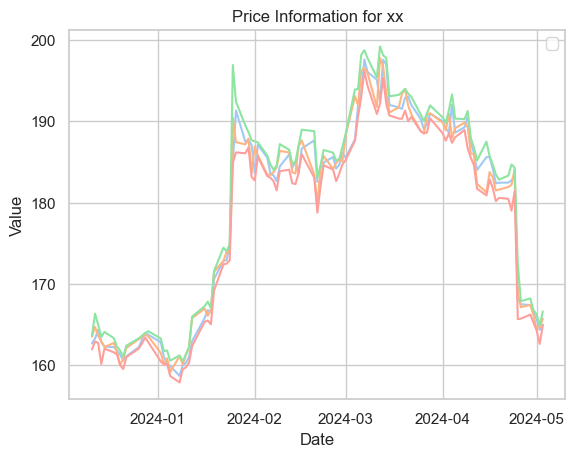

In [39]:
import seaborn as sns 

sns.set_theme(style = 'whitegrid', palette = 'pastel')

## set figure size for publishing 

plt.plot(df['Open'])
plt.plot(df['Close'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend()

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Price Information for xx')

plt.show()
 
# Adding labels and title 
